In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("C:\data\student\leads_basic_details1.csv")
df2 = pd.read_csv("C:\data\student\leads_demo_watched_details2.csv")
df3 = pd.read_csv ("C:\data\student\leads_interaction_details3.csv")
df4 = pd.read_csv ("C:\data\student\leads_reasons_for_no_interest4.csv")
df5 = pd.read_csv ("C:\data\student\sales_managers_assigned_leads_details5.csv")

### Data cleaning and Handling

In [3]:
print ('SHAPE OF  DATASETS:-- \n')
print ('leads_basic_details1: ',df1.shape)
print ('leads_deamo_watched_details2: ',df2.shape)
print ('leads_interaction_details3: ',df3.shape)
print ('leads_reasion_for_no_interest4: ',df4.shape)
print ('sales_managers_assigned_leads_details5: ',df5.shape)

SHAPE OF  DATASETS:-- 

leads_basic_details1:  (360, 7)
leads_deamo_watched_details2:  (194, 4)
leads_interaction_details3:  (2192, 6)
leads_reasion_for_no_interest4:  (294, 4)
sales_managers_assigned_leads_details5:  (360, 5)


In [4]:
print ('DUPLICATES COUNT:-- \n')
print ('leads_basic_details1: ',df1.duplicated().sum())
print ('leads_deamo_watched_details2: ',df2.duplicated().sum())
print ('leads_interaction_details3: ',df3.duplicated().sum())
print ('leads_reasion_for_no_interest4: ',df4.duplicated().sum())
print ('sales_managers_assigned_leads_details5: ',df5.duplicated().sum())

DUPLICATES COUNT:-- 

leads_basic_details1:  0
leads_deamo_watched_details2:  0
leads_interaction_details3:  438
leads_reasion_for_no_interest4:  0
sales_managers_assigned_leads_details5:  0


### we should drop thes duplicate records before using the data for analysis.

In [5]:
df3.drop_duplicates(inplace= True)
print ('leads_interaction_details:', df3.duplicated().sum())

leads_interaction_details: 0


In [6]:
print ('NULL VALUE COUNT \n')
print ('leades_basic_details1: \n\n', df1.isnull().sum())
print ('leades_deamo_watched_details2: \n\n',df2.isnull().sum())
print ('leads_interaction_details3: \n\n',df3.isnull().sum())
print ('leads_reasion_for_no_interest4: \n\n',df4.isnull().sum())
print ('sales_managers_assigned_leads_details5: \n\n',df5.isnull().sum())

NULL VALUE COUNT 

leades_basic_details1: 

 lead_id              0
age                  0
gender               0
current_city         0
current_education    0
parent_occupation    0
lead_gen_source      0
dtype: int64
leades_deamo_watched_details2: 

 lead_id               0
demo_watched_date     0
language              0
watched_percentage    0
dtype: int64
leads_interaction_details3: 

 jnr_sm_id         0
lead_id           0
lead_stage        0
call_done_date    0
call_status       0
call_reason       0
dtype: int64
leads_reasion_for_no_interest4: 

 lead_id                                     0
reasons_for_not_interested_in_demo        130
reasons_for_not_interested_to_consider    215
reasons_for_not_interested_to_convert     243
dtype: int64
sales_managers_assigned_leads_details5: 

 snr_sm_id        0
jnr_sm_id        0
assigned_date    0
cycle            0
lead_id          0
dtype: int64


#### => Now we start looking for null values, duplicates, outliers and                     inconsistencies in the data
####  => we start working on each dataset from df1 through df5
      
      
## Dataframe df1

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            360 non-null    object
 1   age                360 non-null    int64 
 2   gender             360 non-null    object
 3   current_city       360 non-null    object
 4   current_education  360 non-null    object
 5   parent_occupation  360 non-null    object
 6   lead_gen_source    360 non-null    object
dtypes: int64(1), object(6)
memory usage: 19.8+ KB


In [8]:
df1.describe()

,age
count,360.000000
mean,21.561111
std,11.555444
min,16.000000
25%,18.000000
50%,21.000000
75%,24.000000
max,211.000000


#### their is huse gap b/t the 75% and manX value 

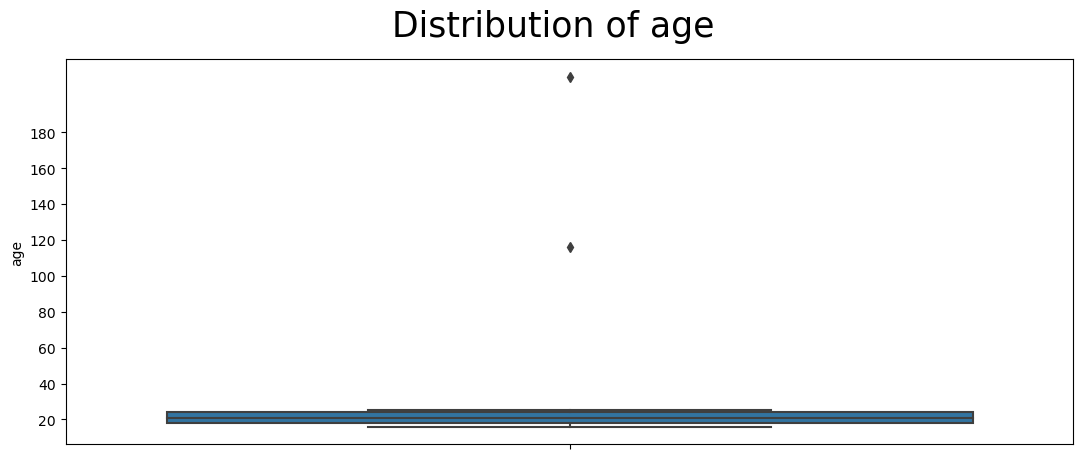

In [9]:
plt.figure(figsize = (13,5))
plt.suptitle("Distribution of age", fontsize = 25, fontweight =20, color = 'Black')
ticks = np.arange(0,200,20)
label= ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df1.age)


plt.show()


#### their is two outlines we should remove it

In [10]:
# Seperating values greater than 90 percentile as outliers.

In [11]:
df1_outlier = df1[df1.age>df1.age.quantile(0.90)]

df1_outlier

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source
17,USR1018,211,MALE,Hyderabad,Degree,IT Employee,social_media
300,USR1301,116,FEMALE,Hyderabad,Intermediate,Private Employee,social_media


In [12]:
# remove the outliers for df1 dataset
df1= df1.drop([df1_outlier.index[0], df1_outlier.index[1]])

In [13]:
df1.shape

(358, 7)

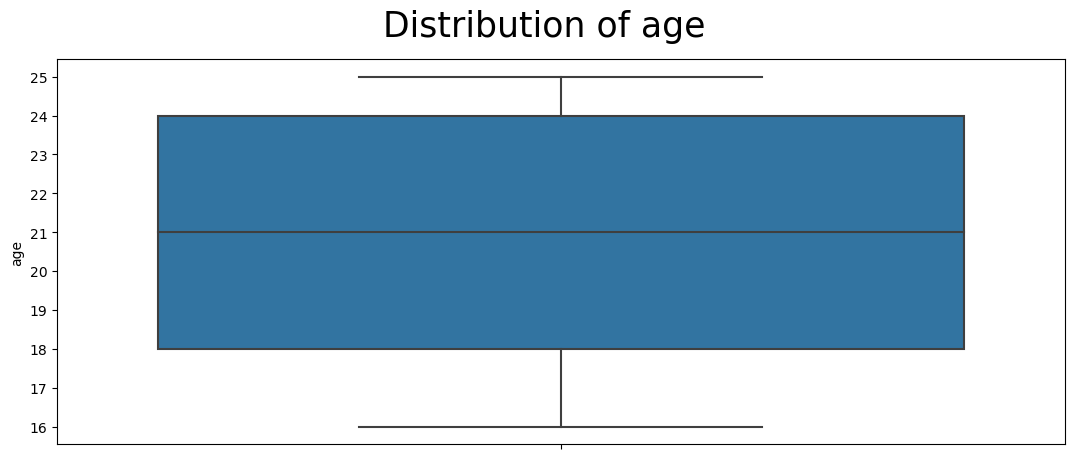

In [14]:
#re-ploting age distribution after handling the outliers
plt.figure(figsize = (13,5))
plt.suptitle("Distribution of age", fontsize = 25, fontweight =20, color = 'Black')
ticks = np.arange(0,30,1)
label= ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df1.age)


plt.show()

#### majority of student are aged between 18 to 24 years.

In [15]:
df1.gender.value_counts()

FEMALE    198
MALE      160
Name: gender, dtype: int64

In [16]:
df1.columns

Index(['lead_id', 'age', 'gender', 'current_city', 'current_education',
       'parent_occupation', 'lead_gen_source'],
      dtype='object')

In [17]:
df1.current_education.value_counts()

B.Tech                    139
Looking for Job           117
Degree                     42
Intermediate               40
Intermediate Completed     12
10th Completed              8
Name: current_education, dtype: int64

#### we notish that 'intermediate' and 'intermediate completed' are same thats why we marge the value in 'intermediate' for find more accurate result.

In [18]:
df1['current_education'].replace ({'Intermediate Completed':'Intermediate'}, inplace=True)

In [19]:
# try
df1.current_education.value_counts()

B.Tech             139
Looking for Job    117
Intermediate        52
Degree              42
10th Completed       8
Name: current_education, dtype: int64

## Dataframe df2

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   lead_id             194 non-null    object
 1   demo_watched_date   194 non-null    object
 2   language            194 non-null    object
 3   watched_percentage  194 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 6.2+ KB


In [21]:
df2.describe()

,watched_percentage
count,194.000000
mean,56.634021
std,43.555635
min,2.000000
25%,35.000000
50%,55.500000
75%,75.750000
max,510.000000


#### we can obsserve def b/t 75% and max value

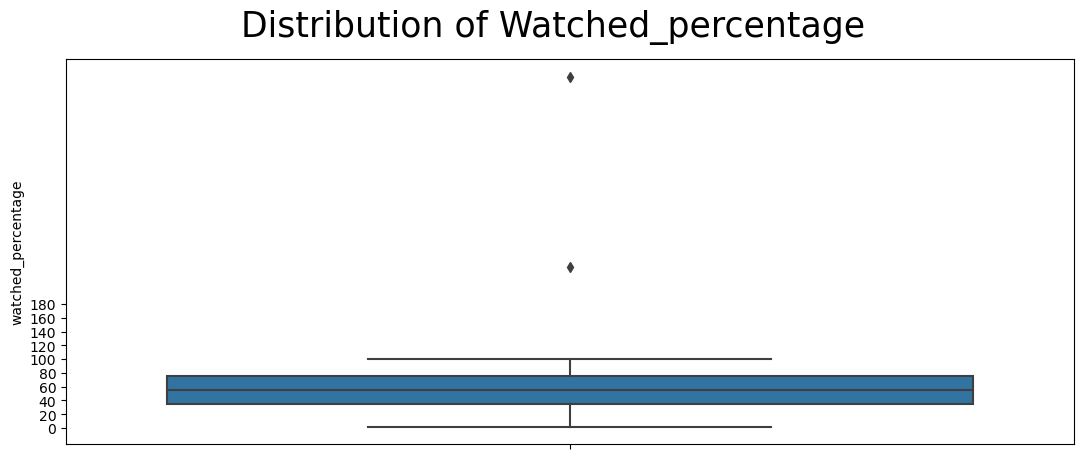

In [22]:
plt.figure(figsize = (13,5))
plt.suptitle("Distribution of Watched_percentage", fontsize = 25, fontweight =20, color = 'Black')
ticks = np.arange(0,200,20)
label= ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y=df2.watched_percentage)


plt.show()

In [23]:
df2_outlier = df2[df2.watched_percentage>100]

df2_outlier

,lead_id,demo_watched_date,language,watched_percentage
94,USR1138,2/20/2022,English,510
133,USR1213,1/20/2022,Telugu,233


In [24]:
df2 = df2.drop([df2_outlier.index[0], df2_outlier.index [1]])
df2.shape

(192, 4)

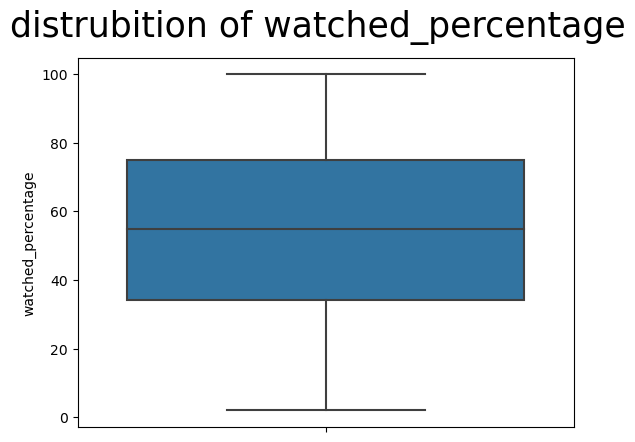

In [25]:
# plotting watched peracentage after handling outliers.
plt.suptitle("distrubition of watched_percentage", fontsize = 25, fontweight = 5, color = 'Black')
ticks = np.arange(0,200,20)
label = ["{}".format(i) for i in ticks]
plt.yticks(ticks,label)
sns.boxplot(y = df2.watched_percentage)

plt.show()

In [26]:
df2= df2.drop(['demo_watched_date'], axis = 1)

In [27]:
df2

,lead_id,language,watched_percentage
0,USR1002,Telugu,42
1,USR1003,Telugu,81
2,USR1004,Telugu,35
3,USR1005,Hindi,38
4,USR1006,Hindi,54
...,...,...,...
189,USR1317,English,48
190,USR1318,English,83
191,USR1319,English,84
192,USR1343,English,68


## Dataframe df3

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1754 entries, 0 to 2191
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   jnr_sm_id       1754 non-null   object
 1   lead_id         1754 non-null   object
 2   lead_stage      1754 non-null   object
 3   call_done_date  1754 non-null   object
 4   call_status     1754 non-null   object
 5   call_reason     1754 non-null   object
dtypes: object(6)
memory usage: 95.9+ KB


In [29]:
df3 = df3.drop(['call_done_date'], axis =1)
df3.head()

,jnr_sm_id,lead_id,lead_stage,call_status,call_reason
0,JNR1001MG,USR1001,lead,successful,lead_introduction
1,JNR1001MG,USR1001,lead,successful,demo_schedule
2,JNR1001MG,USR1002,lead,successful,lead_introduction
3,JNR1001MG,USR1002,lead,successful,demo_schedule
4,JNR1001MG,USR1002,awareness,successful,post_demo_followup


In [30]:
# Identify and drop duplicates
print(df3.duplicated().sum())
df3.drop_duplicates(inplace= True)

11


In [31]:
# renaming the stages according the last stage each lead

df3['lead_stage'].replace({'lead':'lead stage','lead-awareness':'Awareness stage',
                           'lead-awareness-consideration':'consideration stage',
                          'lead-awareness-consideration-coversion':'conversion stage'},
                         inplace = True)

In [32]:
#varifing
df3.lead_stage.value_counts()

lead stage       1196
consideration     254
awareness         229
conversion         64
Name: lead_stage, dtype: int64

## Dataframe df4

In [33]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 4 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   lead_id                                 294 non-null    object
 1   reasons_for_not_interested_in_demo      164 non-null    object
 2   reasons_for_not_interested_to_consider  79 non-null     object
 3   reasons_for_not_interested_to_convert   51 non-null     object
dtypes: object(4)
memory usage: 9.3+ KB


In [34]:
# Replacing Null values with an empty string
df4['reasons_for_not_interested_in_demo'] = df4['reasons_for_not_interested_in_demo'].fillna('')
df4['reasons_for_not_interested_to_consider'] = df4['reasons_for_not_interested_to_consider'].fillna('')
df4['reasons_for_not_interested_to_convert'] = df4['reasons_for_not_interested_to_convert'].fillna('')

In [35]:
# Combine all the values in the existing columns and store them in the new column.
df4['Reason_for_not_interested'] = df4['reasons_for_not_interested_in_demo'] + df4['reasons_for_not_interested_to_consider'] + df4['reasons_for_not_interested_to_convert']

In [36]:
# Drop the redundant columns that are no longer required for analysis
df4 = df4.drop(['reasons_for_not_interested_in_demo','reasons_for_not_interested_to_consider', 'reasons_for_not_interested_to_convert'], axis=1)

In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    294 non-null    object
 1   Reason_for_not_interested  294 non-null    object
dtypes: object(2)
memory usage: 4.7+ KB


In [38]:
df4.Reason_for_not_interested.value_counts()

Can't afford                        95
Wants offline classes               91
Student not interested in domain    52
No time for student                 38
Will join in final year             14
Cannot afford                        4
Name: Reason_for_not_interested, dtype: int64

In [39]:
df4['Reason_for_not_interested'].replace({"can't afford":'cannot afford'},inplace = True)

## Dataframe df5

In [40]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   snr_sm_id      360 non-null    object
 1   jnr_sm_id      360 non-null    object
 2   assigned_date  360 non-null    object
 3   cycle          360 non-null    int64 
 4   lead_id        360 non-null    object
dtypes: int64(1), object(4)
memory usage: 14.2+ KB


In [41]:
df5 = df5.drop(['assigned_date'], axis =1)

In [42]:
# Removeing the outliers identified in df2 from df5
df5 = df5.drop([df1_outlier.index[0], df1_outlier.index[1],df2_outlier.index[0], df2_outlier.index[1]])

In [43]:
print ('SHAPE OF  DATASETS:-- \n')
print ('leads_basic_details1: ',df1.shape)
print ('leads_deamo_watched_details2: ',df2.shape)
print ('leads_interaction_details3: ',df3.shape)
print ('leads_reasion_for_no_interest4: ',df4.shape)
print ('sales_managers_assigned_leads_details5: ',df5.shape)

SHAPE OF  DATASETS:-- 

leads_basic_details1:  (358, 7)
leads_deamo_watched_details2:  (192, 3)
leads_interaction_details3:  (1743, 5)
leads_reasion_for_no_interest4:  (294, 2)
sales_managers_assigned_leads_details5:  (356, 4)


In [44]:
L1 = pd.merge(df1,df3)
L1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 0 to 1733
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            1734 non-null   object
 1   age                1734 non-null   int64 
 2   gender             1734 non-null   object
 3   current_city       1734 non-null   object
 4   current_education  1734 non-null   object
 5   parent_occupation  1734 non-null   object
 6   lead_gen_source    1734 non-null   object
 7   jnr_sm_id          1734 non-null   object
 8   lead_stage         1734 non-null   object
 9   call_status        1734 non-null   object
 10  call_reason        1734 non-null   object
dtypes: int64(1), object(10)
memory usage: 162.6+ KB


In [45]:
L2 = pd.merge(L1,df5)
L2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   lead_id            1726 non-null   object
 1   age                1726 non-null   int64 
 2   gender             1726 non-null   object
 3   current_city       1726 non-null   object
 4   current_education  1726 non-null   object
 5   parent_occupation  1726 non-null   object
 6   lead_gen_source    1726 non-null   object
 7   jnr_sm_id          1726 non-null   object
 8   lead_stage         1726 non-null   object
 9   call_status        1726 non-null   object
 10  call_reason        1726 non-null   object
 11  snr_sm_id          1726 non-null   object
 12  cycle              1726 non-null   int64 
dtypes: int64(2), object(11)
memory usage: 188.8+ KB


In [46]:
L3 = pd.merge(L2, df4, how = 'left', on='lead_id')
L3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    1726 non-null   object
 1   age                        1726 non-null   int64 
 2   gender                     1726 non-null   object
 3   current_city               1726 non-null   object
 4   current_education          1726 non-null   object
 5   parent_occupation          1726 non-null   object
 6   lead_gen_source            1726 non-null   object
 7   jnr_sm_id                  1726 non-null   object
 8   lead_stage                 1726 non-null   object
 9   call_status                1726 non-null   object
 10  call_reason                1726 non-null   object
 11  snr_sm_id                  1726 non-null   object
 12  cycle                      1726 non-null   int64 
 13  Reason_for_not_interested  1205 non-null   object
dtypes: int64

In [47]:
L3['Reason_for_not_interested'] = L3['Reason_for_not_interested'].fillna('Shown interest')

In [48]:
L3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    1726 non-null   object
 1   age                        1726 non-null   int64 
 2   gender                     1726 non-null   object
 3   current_city               1726 non-null   object
 4   current_education          1726 non-null   object
 5   parent_occupation          1726 non-null   object
 6   lead_gen_source            1726 non-null   object
 7   jnr_sm_id                  1726 non-null   object
 8   lead_stage                 1726 non-null   object
 9   call_status                1726 non-null   object
 10  call_reason                1726 non-null   object
 11  snr_sm_id                  1726 non-null   object
 12  cycle                      1726 non-null   int64 
 13  Reason_for_not_interested  1726 non-null   object
dtypes: int64

In [49]:
L4 = pd.merge(L3,df2,how='left',on='lead_id')
L4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   lead_id                    1726 non-null   object 
 1   age                        1726 non-null   int64  
 2   gender                     1726 non-null   object 
 3   current_city               1726 non-null   object 
 4   current_education          1726 non-null   object 
 5   parent_occupation          1726 non-null   object 
 6   lead_gen_source            1726 non-null   object 
 7   jnr_sm_id                  1726 non-null   object 
 8   lead_stage                 1726 non-null   object 
 9   call_status                1726 non-null   object 
 10  call_reason                1726 non-null   object 
 11  snr_sm_id                  1726 non-null   object 
 12  cycle                      1726 non-null   int64  
 13  Reason_for_not_interested  1726 non-null   objec

In [50]:
L4['language'] = L4['language'].fillna('info Unavailable')

In [51]:
L4['watched_percentage'] = L4['watched_percentage'].fillna('0')

In [52]:
L4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 0 to 1725
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   lead_id                    1726 non-null   object
 1   age                        1726 non-null   int64 
 2   gender                     1726 non-null   object
 3   current_city               1726 non-null   object
 4   current_education          1726 non-null   object
 5   parent_occupation          1726 non-null   object
 6   lead_gen_source            1726 non-null   object
 7   jnr_sm_id                  1726 non-null   object
 8   lead_stage                 1726 non-null   object
 9   call_status                1726 non-null   object
 10  call_reason                1726 non-null   object
 11  snr_sm_id                  1726 non-null   object
 12  cycle                      1726 non-null   int64 
 13  Reason_for_not_interested  1726 non-null   object
 14  language

In [53]:
L4.duplicated().sum()

0

In [54]:
L4['lead_status'] = np.where(L4['lead_stage'] == 'Conversion Stage','Converted Lead', 'Yet to convert Lead')

In [55]:
L4.head()

,lead_id,age,gender,current_city,current_education,parent_occupation,lead_gen_source,jnr_sm_id,lead_stage,call_status,call_reason,snr_sm_id,cycle,Reason_for_not_interested,language,watched_percentage,lead_status
0,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead stage,successful,lead_introduction,SNR501MG,1,No time for student,info Unavailable,0,Yet to convert Lead
1,USR1001,16,FEMALE,Hyderabad,Intermediate,Private Employee,social_media,JNR1001MG,lead stage,successful,demo_schedule,SNR501MG,1,No time for student,info Unavailable,0,Yet to convert Lead
2,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead stage,successful,lead_introduction,SNR501MG,1,Shown interest,Telugu,42.0,Yet to convert Lead
3,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,lead stage,successful,demo_schedule,SNR501MG,1,Shown interest,Telugu,42.0,Yet to convert Lead
4,USR1002,20,MALE,Bengaluru,B.Tech,Business,user_referrals,JNR1001MG,awareness,successful,post_demo_followup,SNR501MG,1,Shown interest,Telugu,42.0,Yet to convert Lead


## Analysis

Text(4.944444444444445, 0.5, 'No of leads')

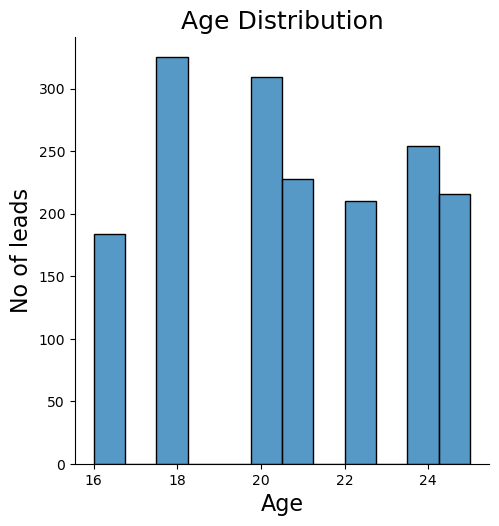

In [56]:
sns.displot(L4["age"],palette="Blues_d")
plt.title('Age Distribution',fontsize = 18)
plt.xlabel('Age',fontsize =16)
plt.ylabel('No of leads', fontsize=16)

#### from the plot we can observe te maximum no leads are 18 to 20 years old.

FEMALE    985
MALE      741
Name: gender, dtype: int64

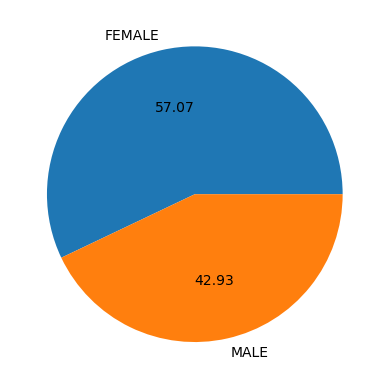

In [57]:
ax = L4.groupby('gender').size().plot(kind='pie',autopct='%.2f', y='lead_id',ylabel='')
L4["gender"].value_counts()

##### from the pie chart mentioned there are more number of female leads than male lead.

Text(0.5, 1.0, 'current Education')

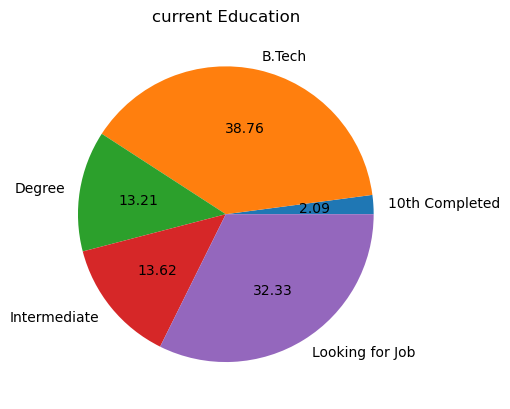

In [58]:
ax = L4.groupby('current_education').size().plot(kind='pie',autopct='%.2f',y='lead_id',ylabel='')
ax.set_title("current Education")

#### from the above chart we can observe majority of leads are pursuing higher education or are in search of job.

Text(0.5, 1.0, 'lead source')

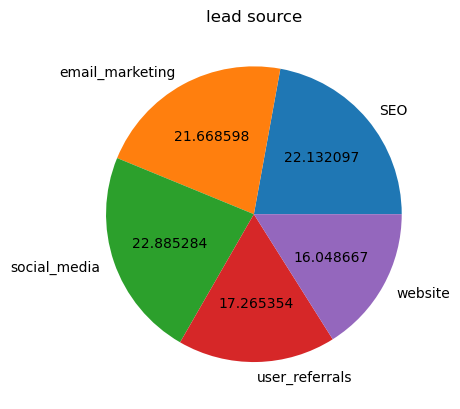

In [59]:
ax = L4.groupby('lead_gen_source').size().plot(kind='pie',autopct='%2f',y='lead_id',ylabel='')
ax.set_title("lead source")

#### Around 24% of the leads came to know about the firm through socilmedia.other major source contributing are SEO and email_marketing  with contribute around  20% each.

Text(13.819444444444445, 0.5, 'No of Leads watched video')

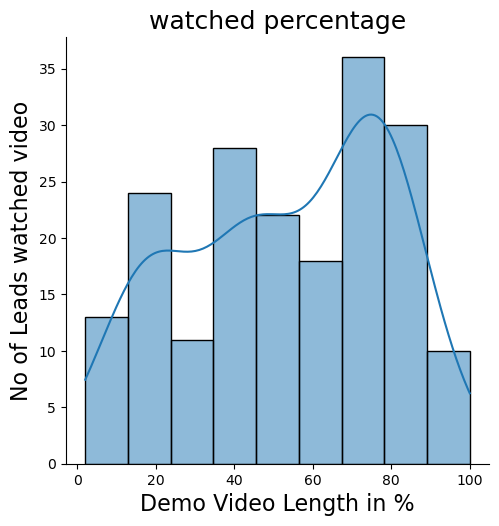

In [60]:
sns.displot(df2.watched_percentage, palette="Blues_d",kde=True)
plt.title('watched percentage' , fontsize=18)
plt.xlabel('Demo Video Length in %', fontsize =16)
plt.ylabel('No of Leads watched video', fontsize =16)

#### from the graph we can say more than 35 leads watched around 70-80% of the video.Around 10 leads watched deamo video. Through analysing the curve we can say majority of the leads population watch demo video over 40%

In [61]:
merged_leads_demo = pd.merge(df2,df1, how= 'inner',on = 'lead_id')
merged_leads_demo .head(5)

,lead_id,language,watched_percentage,age,gender,current_city,current_education,parent_occupation,lead_gen_source
0,USR1002,Telugu,42,20,MALE,Bengaluru,B.Tech,Business,user_referrals
1,USR1003,Telugu,81,20,FEMALE,Visakhapatnam,B.Tech,Lawyer,user_referrals
2,USR1004,Telugu,35,16,MALE,Mumbai,Intermediate,IT Employee,user_referrals
3,USR1005,Hindi,38,16,MALE,Chennai,Intermediate,Government Employee,user_referrals
4,USR1006,Hindi,54,16,MALE,Kochi,Intermediate,Doctor,user_referrals


In [62]:
merged_leads_demo.groupby(['language', 'current_city']).size()

language  current_city 
English   Bengaluru        22
          Chennai          17
          Hyderabad        20
          Kochi            19
          Mumbai           11
          Visakhapatnam    22
Hindi     Bengaluru         3
          Chennai           6
          Hyderabad         3
          Kochi             4
          Mumbai            1
          Visakhapatnam     2
Telugu    Bengaluru         7
          Chennai           7
          Hyderabad        17
          Kochi             8
          Mumbai            7
          Visakhapatnam    15
dtype: int64

#### English language is dominant while Telugu is majorly being used in Hydrerabad and Vishakapatnam

Text(0.5, 1.0, 'Demo Language')

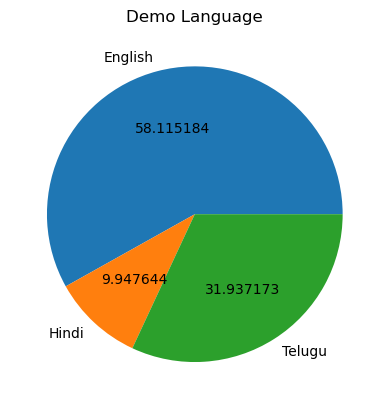

In [63]:
ax = merged_leads_demo.groupby('language').size().plot(kind='pie',autopct='%2f', y='lead_id', ylabel='')
ax.set_title("Demo Language")

#### From the pie we can consider around 58% of customers prefer watching Demo video in English making it the major language.Around 32% of leads population prefer  watching Demo in Telegu and the remaining 10% prefer Hindi.

In [64]:
merged_interaction_demo = pd.merge(df2, df3, how= 'inner',on= 'lead_id')
merged_interaction_demo

,lead_id,language,watched_percentage,jnr_sm_id,lead_stage,call_status,call_reason
0,USR1002,Telugu,42,JNR1001MG,lead stage,successful,lead_introduction
1,USR1002,Telugu,42,JNR1001MG,lead stage,successful,demo_schedule
2,USR1002,Telugu,42,JNR1001MG,awareness,successful,post_demo_followup
3,USR1002,Telugu,42,JNR1001MG,awareness,successful,followup_for_consideration
4,USR1002,Telugu,42,JNR1001MG,consideration,successful,interested_for_conversion
...,...,...,...,...,...,...,...
1227,USR1348,English,72,JNR1012MG,lead stage,successful,demo_not_attended
1228,USR1348,English,72,JNR1012MG,awareness,successful,post_demo_followup
1229,USR1348,English,72,JNR1012MG,awareness,successful,followup_for_consideration
1230,USR1348,English,72,JNR1012MG,consideration,successful,followup_for_conversion


In [65]:
merged_interaction_demo.groupby(['call_status','call_reason']).size()

call_status   call_reason               
successful    demo_not_attended             155
              demo_schedule                 192
              followup_for_consideration     30
              followup_for_conversion       101
              interested_for_conversion     113
              lead_introduction             192
              post_demo_followup            192
              successful_conversion          63
unsuccessful  demo_not_attended              45
              demo_schedule                  15
              followup_for_consideration      5
              followup_for_conversion        19
              interested_for_conversion      18
              lead_introduction              92
dtype: int64

#### sales manager require to focus on earlier stages of acquistion process. work need to done at the primary stage to imbibe curiosity amoung the leads to watch Demo videos.

In [66]:
df4.describe()

,lead_id,Reason_for_not_interested
count,294,294
unique,294,6
top,USR1001,Can't afford
freq,1,95


#### from the table we observe There are 5 unique reasion for students not being interested of watch the major reason is the users can't afford. major reasons for leads dropping out are because of affrdibility issues.

In [67]:
df5.groupby(['snr_sm_id','jnr_sm_id']).size()

snr_sm_id  jnr_sm_id
SNR501MG   JNR1001MG    33
           JNR1002MG    20
           JNR1003MG    20
           JNR1004MG    20
SNR502MG   JNR1005MG    19
           JNR1006MG    20
           JNR1007MG    19
           JNR1008MG    20
SNR503MG   JNR1009MG    20
           JNR1010MG    21
           JNR1011MG    26
           JNR1012MG    31
SNR504MG   JNR1013MG    20
           JNR1014MG    20
           JNR1015MG    21
           JNR1016MG    26
dtype: int64

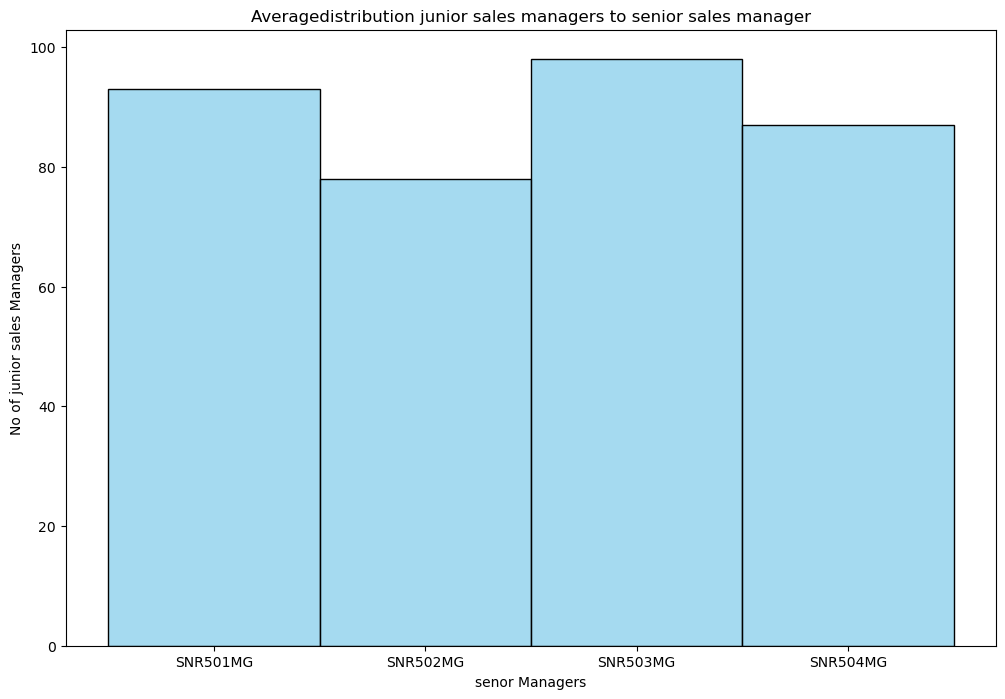

In [68]:
fig,ax=plt.subplots(figsize=(12,8))
ax=sns.histplot(data=df5["snr_sm_id"],bins=4,color="skyblue")
ax.set(title="Averagedistribution junior sales managers to senior sales manager",ylabel="No of junior sales Managers",xlabel="senor Managers");

#### Number of junior sales managers are almost evenly assigned among senior salse  managers. Here we have total of 4 senior managers

In [69]:
# percentage of leads acquired
acquired_leads=L4.query('call_reason == "successful_conversion"')['lead_id'].nunique()
acquired_leads

64

In [70]:
total_no_of_leads=L4.lead_id.nunique()
total_no_of_leads

354

In [71]:
percent_of_leads_acquired=acquired_leads/total_no_of_leads*100
print(percent_of_leads_acquired)

18.07909604519774


Text(0.5, 1.0, 'percentage of Leads')

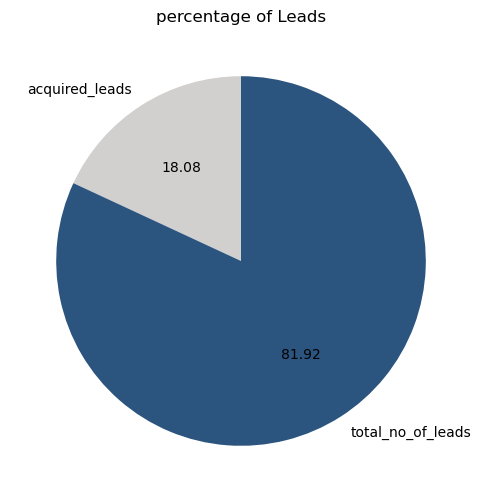

In [72]:
no_of_leads_acquired=np.array([acquired_leads, total_no_of_leads-acquired_leads])                             
ig,ax=plt.subplots(figsize=(12,6))
ax.pie(no_of_leads_acquired,labels=["acquired_leads","total_no_of_leads"],autopct='%.2f',colors=["#D1D0CE","#2B547E"],startangle=90)
ax.set_title("percentage of Leads")

### approximately around 18% of customer acquisition is successfully done by the team